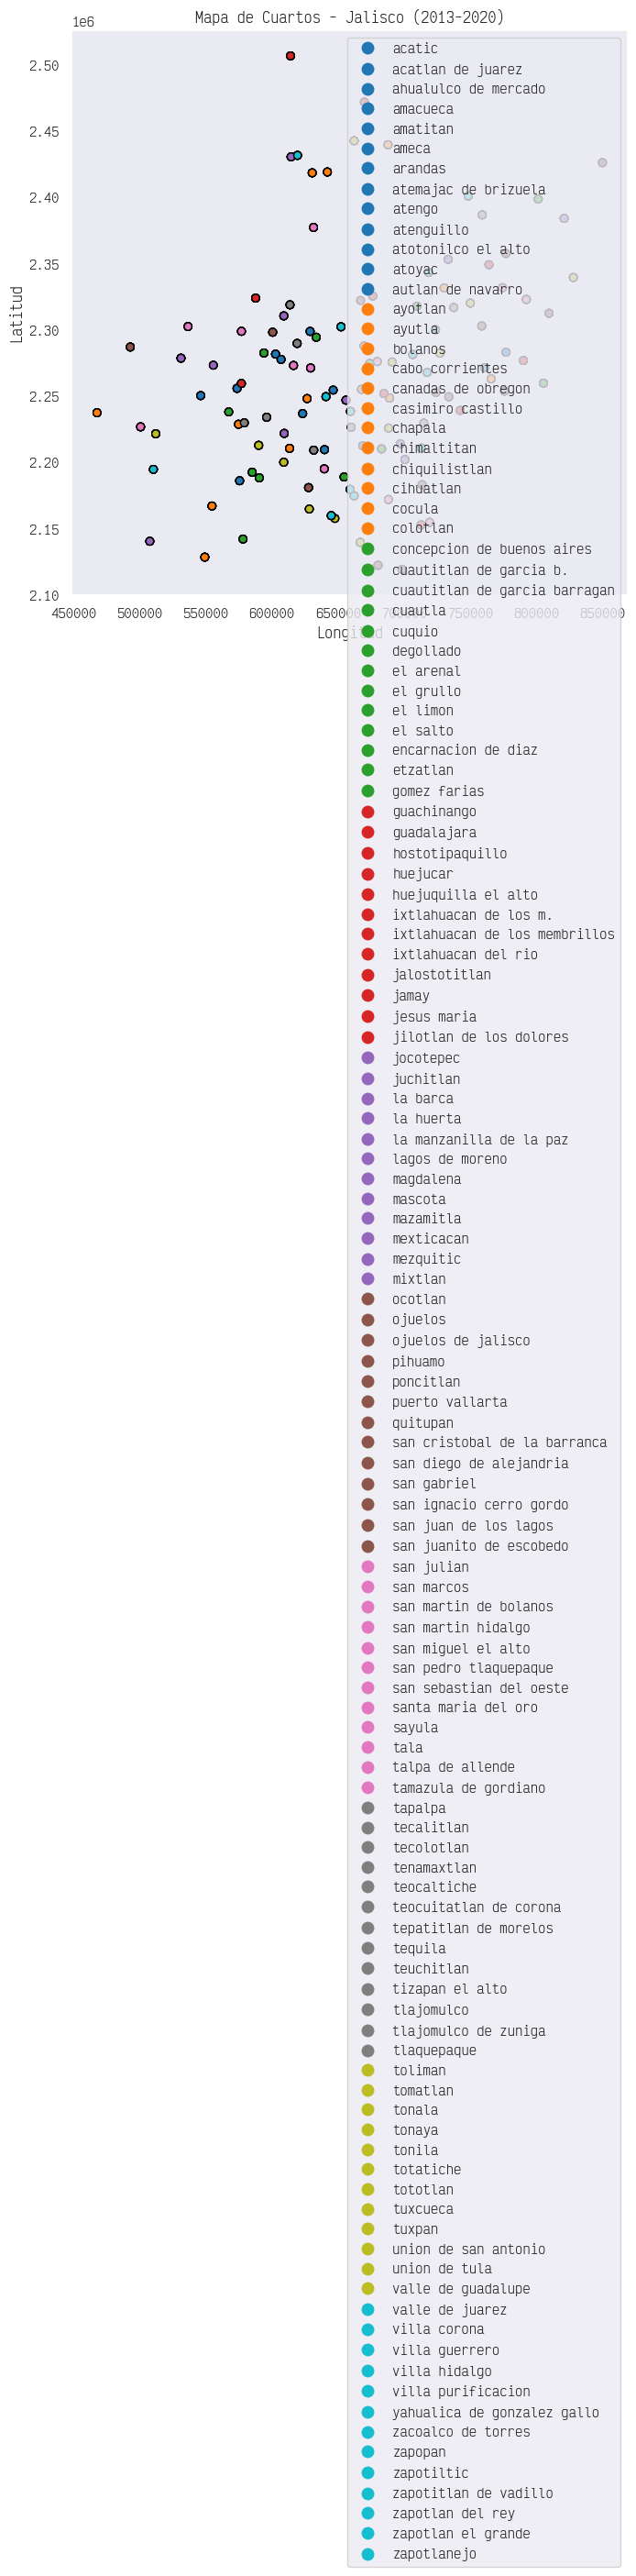

In [73]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Carga del shapefile (asegúrate que todos los archivos están en el mismo directorio)
gdf = gpd.read_file("df_cuartos.shp")
jalisco_df = gpd.read_file('LimiteMunicipal_MGJ2012_modificadoDecreto26837.shp')


# gdf.set_crs(epsg=32613, inplace=True)
# jalisco_df.set_crs(epsg=32613, inplace=True)


# gdf.to_crs('EPSG:4326',inplace=True)
# jalisco_df.to_crs('EPSG:4326',inplace=True)

# Mostrar las primeras filas
# print(gdf.head())


# Visualizar el mapa
fig,ax = plt.subplots(figsize=(10,8))
gdf.plot(column='municipio',ax=ax, edgecolor='black', legend=True)
ax.set_aspect('equal')
# gdf.plot(figsize=(10, 8), edgecolor='black',categorical=True,categories=gdf['municipio'])
plt.title("Mapa de Cuartos - Jalisco (2013-2020)")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

sns.set_theme(font='Victor Mono',palette='YlGnBu',style='dark')

In [74]:
# Cargar shapefile
gdf = gpd.read_file("df_cuartos.shp")

# Contar frecuencia de valores únicos en una columna
print(gdf.value_counts())

municipio            total  5 estrella  4 estrella  3 estrella  2 estrella  1 estrella  sin catego  año   region     geometry                      
acatic               66     0           0           0           0           0           66          2017  altos sur  POINT (723611.965 2300309.088)    1
sayula               151    33          59          10          22          18          9           2013  sur        POINT (639576.541 2195268.292)    1
santa maria del oro  11     0           0           0           0           0           11          2018  sureste    POINT (719130.929 2154881.758)    1
                                                                                                    2019  sureste    POINT (719130.929 2154881.758)    1
                                                                                                    2020  sureste    POINT (719130.929 2154881.758)    1
                                                                                       

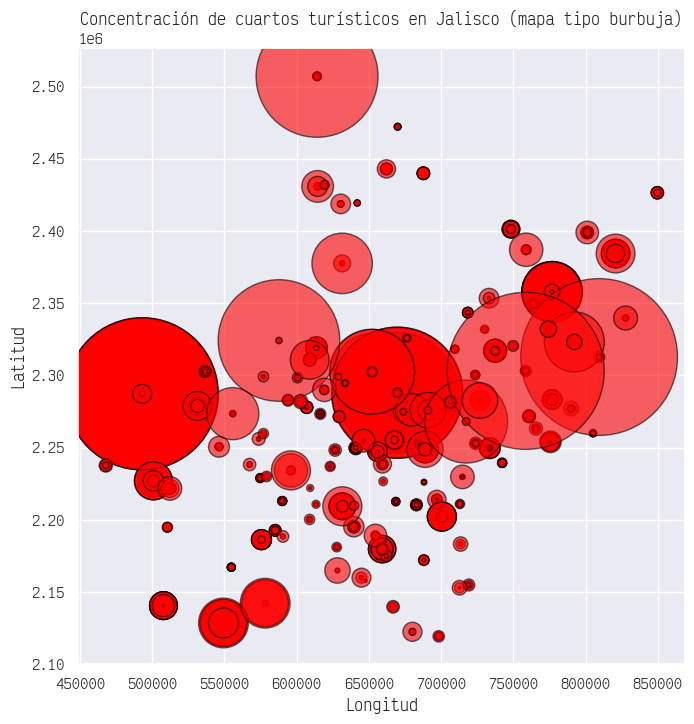

In [75]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Cargar shapefile
gdf = gpd.read_file("df_cuartos.shp")
# 
# Convertir columna a tipo numérico
gdf['total'] = pd.to_numeric(gdf['total'], errors='coerce')

# Graficar burbujas
fig, ax = plt.subplots(figsize=(10, 8))

gdf.plot(
    ax=ax,
    color='red',
    markersize=gdf['total'] * 0.5,
    alpha=0.6,
    edgecolor='black'
)

plt.title("Concentración de cuartos turísticos en Jalisco (mapa tipo burbuja)")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid(True)
plt.show()


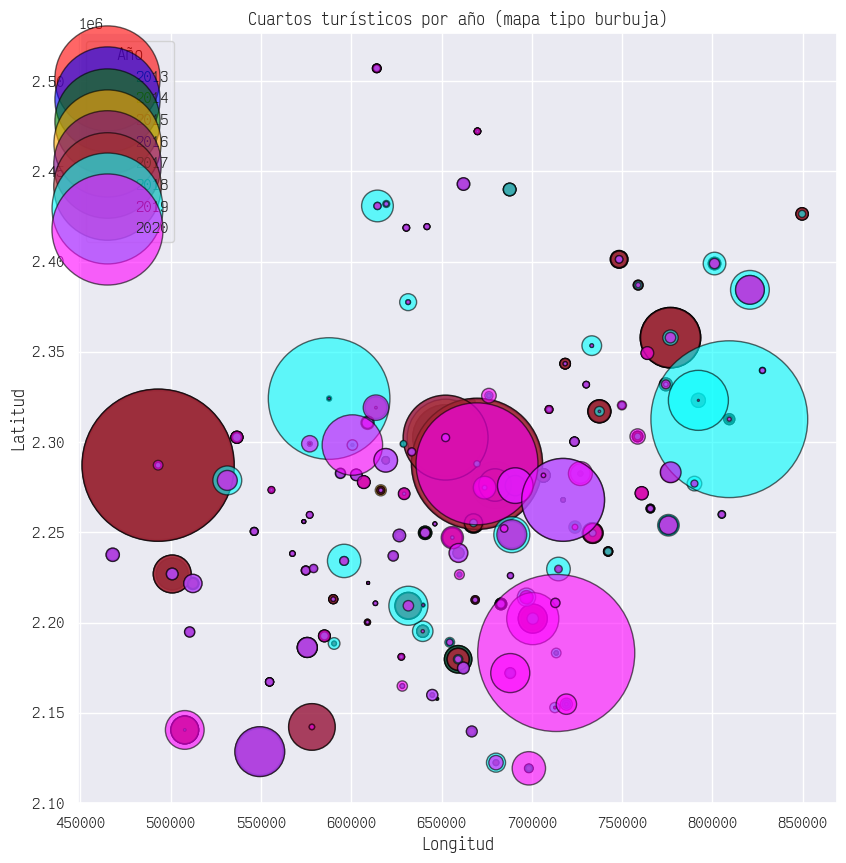

In [76]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Cargar shapefile
gdf = gpd.read_file("df_cuartos.shp")

# Convertir columna 'total' a tipo numérico
gdf['total'] = pd.to_numeric(gdf['total'], errors='coerce')

# Crear figura
fig, ax = plt.subplots(figsize=(12, 10))

# Crear lista de colores (puedes ampliar si tienes más años)
colores = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'cyan', 'magenta']
colors = sns.color_palette('Spectral',gdf['region'].nunique())
# Agrupar por año y graficar
for i, (año, grupo) in enumerate(gdf.groupby('año')):
    grupo.plot(
        ax=ax,
        markersize=grupo['total'] * 0.5,
        color=colores[i % len(colores)],
        alpha=0.6,
        label=str(año),
        edgecolor='black'
    )

plt.title("Cuartos turísticos por año (mapa tipo burbuja)")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.legend(title="Año")
plt.grid(True)
plt.show()


None
None
None


<Axes: title={'center': 'Comparación de cuartos turísticos: 2020 (mapa tipo burbuja)'}, xlabel='Longitud', ylabel='Latitud'>

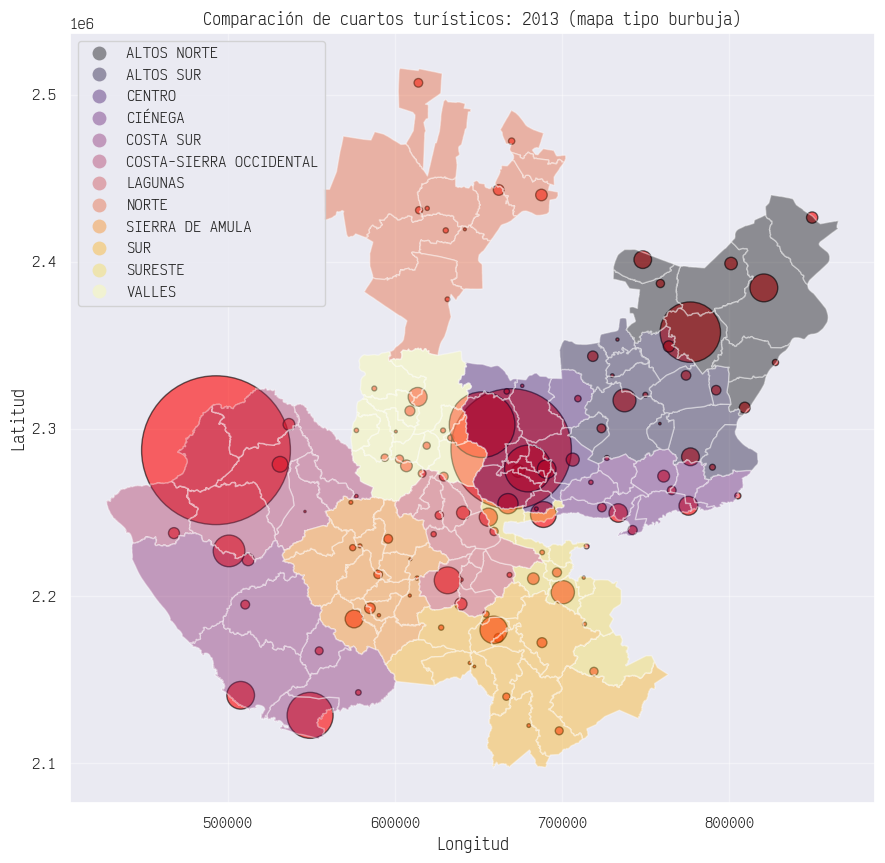

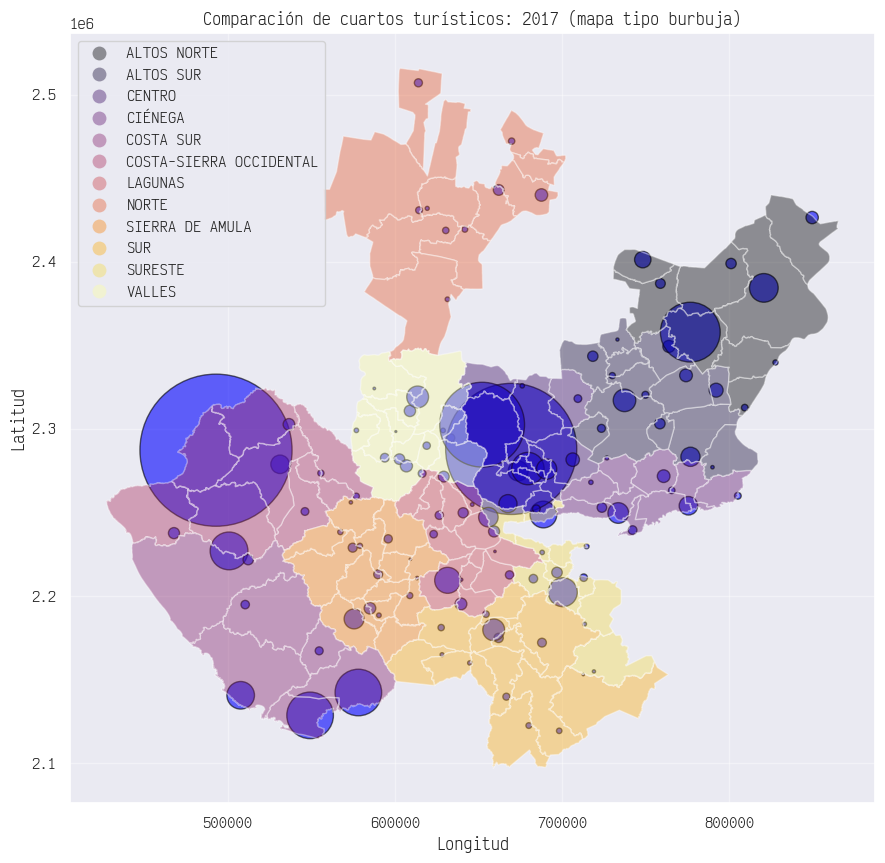

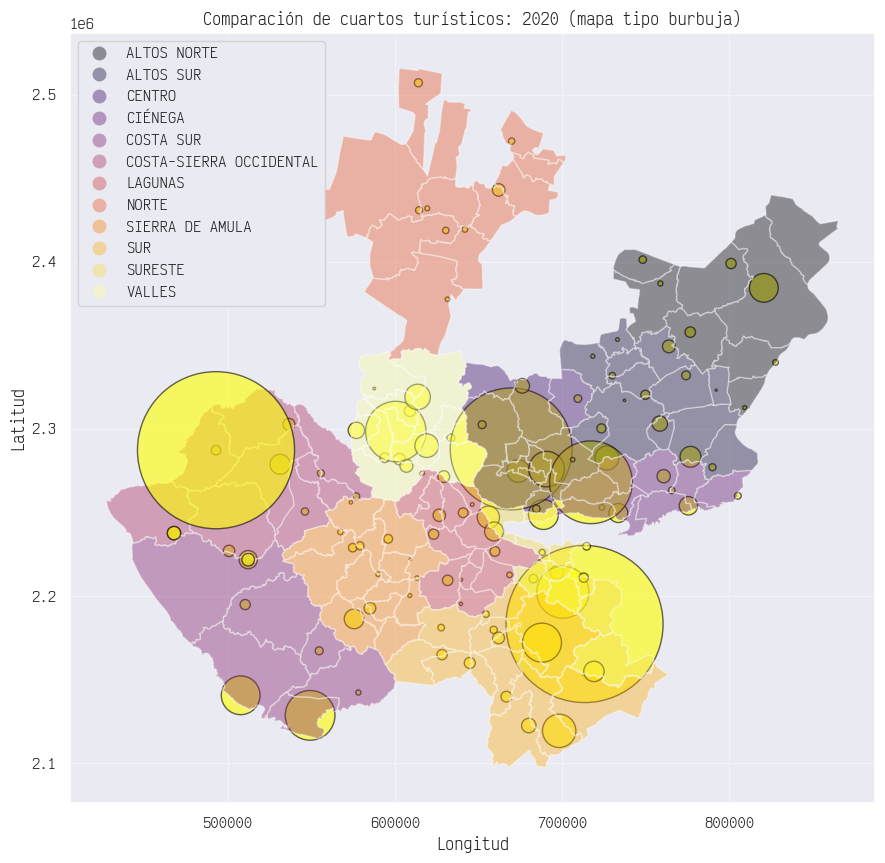

In [86]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Cargar shapefile


# Convertir columna 'total' a tipo numérico
gdf['total'] = pd.to_numeric(gdf['total'], errors='coerce')

# Filtrar solo los años 2013 y 2020
gdf = gdf[gdf['año'].isin([2013,2017, 2020])]

# Crear figura

# Colores para 2013 y 2020
colores = ['red', 'blue','yellow']
colors = sns.color_palette('inferno',jalisco_df['REGIÓN'].nunique(),as_cmap=True)


# Agrupar por año y graficar
for i, (año, grupo) in enumerate(gdf.groupby('año')):
    fig, ax = plt.subplots(figsize=(12, 10))
    grupo.plot(
        ax=ax,
        markersize=grupo['total'] * 0.5,
        color=colores[i],
        alpha=0.6,
        edgecolor='black'
    )
    # display(grupo[grupo['region'] == 'costa norte']['total'])

    jalisco_df.plot(column='REGIÓN', alpha=.4, ax=ax, legend=True, cmap=colors)
    print(jalisco_df.crs)
    plt.grid(alpha=.4)
    plt.title(f"Comparación de cuartos turísticos: {año} (mapa tipo burbuja)")
    plt.xlabel("Longitud")
    plt.ylabel("Latitud")

df = gdf[(gdf['año'] == 2020) & (gdf['region'] == 'costa norte')]

df.plot(
    ax=ax,
    markersize=df['total'] * 0.5,
    color=colores[i],
    alpha=0.6,
    edgecolor='black'
)
    

